# Imports

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import preprocessing
from aux import *

import pandas as pd
pd.options.display.max_columns = 100

# Lectura de datos

In [37]:
# Leemos la base de datos

col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
for i in range(1,5):
    col_names.append('Wilderness_Area_' + str(i))
for i in range(1,41):
    col_names.append('Soil_Type_' + str(i))
col_names.append('Cover_Type')

dataset = pd.read_csv('covtype.data', header=None, names=col_names)

In [38]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [39]:
X = dataset.drop('Cover_Type', axis=1)
y = dataset['Cover_Type']

# Train, test, val split

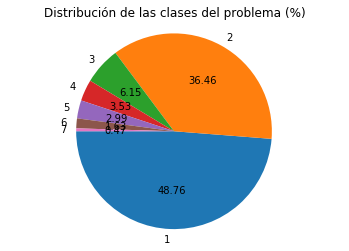

In [40]:
# Distribucion de las clases 
prop_class = y.value_counts(normalize=True)
pieLabels = ['1','2','3','4','5','6','7']
figureObject, axesObject = plt.subplots()
axesObject.pie(prop_class*100, labels=pieLabels, autopct='%1.2f', startangle=180)
axesObject.axis('equal')
plt.title("Distribución de las clases del problema (%)")
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=15120, stratify=y, random_state=1997)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=11340, stratify=y_train, random_state=1997)

In [9]:
y_train.value_counts()
scatter(TSNE(2).fit_transform(X_train), y_train)

2    5530
1    4135
3     698
7     400
6     339
5     185
4      53
Name: Cover_Type, dtype: int64

# Preprocesado

In [45]:
# Prueba (solo normalización)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_new = scaler.transform(X_train)
X_val_new = scaler.transform(X_val)
X_test_new = scaler.transform(X_test)

In [8]:
data_preprocess = Pipeline(
    [
        ("VT", VarianceThreshold()),
        ("Scaler", StandardScaler()),
        ("PCA", PCA(0.95)),
        ("Scaler2", StandardScaler()),
    ]
)

Matriz de correlación pre y post procesado (dígitos)


/usr/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


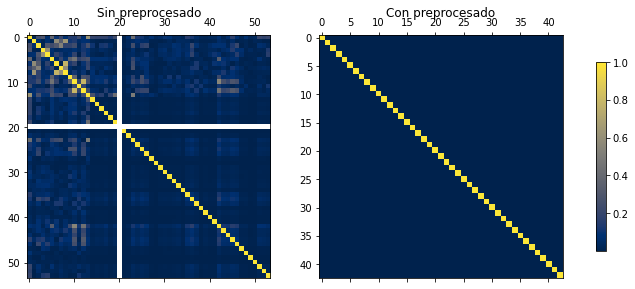

In [9]:
X_train_new = data_preprocess.fit_transform(X_train, y_train)
show_preprocess_correlation_matrix(X_train, X_train_new)

In [10]:
X_train = X_train_new
X_val = data_preprocess.transform(X_val)
X_test = data_preprocess.transform(X_test)

# Modelos a considerar

In [48]:
# Prueba (modelo lineal)
from sklearn.linear_model import LogisticRegressionCV
reg_values = [0.005, 0.01, 0.1, 0.2, 0.3 ,0.5, 0.8, 1.0, 1.2, 1.5, 1.8, 2.0, 10.0, 30.0]
clf = LogisticRegressionCV(Cs=reg_values, cv=3, solver='liblinear', random_state=1997)
ini = time.time()
clf.fit(X_train_new, y_train)
fin = time.time()
print("Tiempo empleado en el ajuste: {:.2f} segundos".format(fin-ini))

Tiempo empleado en el ajuste: 50.84 segundos


In [53]:
y_pred = clf.predict(X_test_new)
print("Accuracy en test:")
print(f1_score(y_test, y_pred, average='weighted'))

Accuracy en test:
0.7013653491598695


In [11]:
seed = 6
models = []
models += [
    (
        "Logistic regresion: C={}".format(c),
        LogisticRegression(
            C=c, multi_class="ovr", penalty="l2", max_iter=1000, random_state=seed
        ),
    )
    for c in np.logspace(-2, 2, 3)
]
models += [
    (
        "RidgeClassifier: \u03B1={}".format(a),
        RidgeClassifier(alpha=a, random_state=seed, max_iter=1000),
    )
    for a in np.logspace(-2, 2, 3)
]
models += [
    (
        "Perceptron: \u03B1={}".format(a),
        Perceptron(alpha=a, penalty="l2", random_state=seed, max_iter=1000),
    )
    for a in np.logspace(-7, -3, 3)
]
models += [
    (
        "{}-NN".format(k),
        KNeighborsClassifier(n_neighbors=k)
    )
    for k in [1,2,3]
]
models += [
    (
        "SVM C={}".format(c),
        SVC(C = c)
    )
    for c in np.logspace(-3, 3, 5)
]

# Elección de modelo

In [12]:
# Devolvemos el mejor modelo de entre los considerados
# best_model = kfold_models(models, X_train, y_train, seed, accuracy_score)
best_model = 0
best_model_score = 0
for (name, model) in models:
    print("--> {} <--".format(name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    val_score = f1_score(y_val, y_pred, average='weighted')
    print("Validation Score: ", val_score)
    if best_model_score < val_score:
        best_model_score = val_score
        best_model = model

--> Logistic regresion: C=0.01 <--
Validation Score:  0.640092452410982
--> Logistic regresion: C=1.0 <--
Validation Score:  0.6775579125642226
--> Logistic regresion: C=100.0 <--
Validation Score:  0.6893031644142877
--> RidgeClassifier: α=0.01 <--
Validation Score:  0.6093309283145929
--> RidgeClassifier: α=1.0 <--
Validation Score:  0.6093309283145929
--> RidgeClassifier: α=100.0 <--
Validation Score:  0.6088961794075585
--> Perceptron: α=1e-07 <--
Validation Score:  0.6091262807233893
--> Perceptron: α=1e-05 <--
Validation Score:  0.6053861570233174
--> Perceptron: α=0.001 <--
Validation Score:  0.5164434553027072
--> 1-NN <--
Validation Score:  0.7449545527726545
--> 2-NN <--
Validation Score:  0.7056232807543666
--> 3-NN <--
Validation Score:  0.7329259351770034
--> SVM C=0.001 <--
Validation Score:  0.3196103117675233
--> SVM C=0.03162277660168379 <--
Validation Score:  0.576360921632037
--> SVM C=1.0 <--
Validation Score:  0.7002246800889258
--> SVM C=31.622776601683793 <--
Val

In [13]:
# Entrenamos el mejor modelo en todo el conjunto de datos
print(best_model)
# best_model.fit(X_train, y_train)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# Predicción

In [14]:
y_pred = best_model.predict(X_test)
print("Accuracy en test:")
print(f1_score(y_test, y_pred, average='weighted'))

Accuracy en test:
0.7796049382777461


<module 'matplotlib.pyplot' from '/usr/lib/python3.8/site-packages/matplotlib/pyplot.py'>

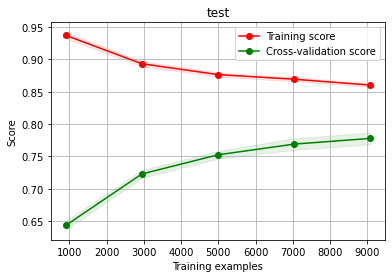

In [15]:
plot_learning_curve(best_model, "test", X_train, y_train)

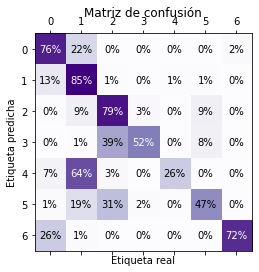

In [16]:
"""Muestra matriz de confusión de la base de datos de dígitos."""
mat = confusion_matrix(y_test, y_pred)
mat = 100 * mat.astype("float64") / mat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
ax.matshow(mat, cmap="Purples")
ax.set(
    title="Matriz de confusión",
    xticks=np.arange(7),
    yticks=np.arange(7),
    xlabel="Etiqueta real",
    ylabel="Etiqueta predicha",
)
for i in range(7):
    for j in range(7):
        ax.text(
            j,
            i,
            "{:.0f}%".format(mat[i, j]),
            ha="center",
            va="center",
            color="black" if mat[i, j] < 50 else "white",
        )

plt.show()